In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [42]:
data = pd.read_csv("migraine_classification.csv")
data.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,1
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,1


In [45]:
x = data_final.iloc[:, 0:23]
y = data_final.iloc[:, -1]

0      1
1      1
2      1
3      1
4      1
      ..
395    6
396    6
397    6
398    6
399    6
Name: Type, Length: 400, dtype: int64

# 1. seleksi unvariate

In [46]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [47]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Specs       Score
0           Age  177.895752
14      Vertigo  143.302687
10       Visual  137.039671
16   Hypoacusis  127.333333
18       Defect  127.333333
12    Dysphasia  108.447722
2     Frequency  107.145822
15     Tinnitus   90.769297
21  Paresthesia   63.666667
5     Intensity   60.090381


2. feature importance

In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [50]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.07741479 0.03547481 0.07483195 0.05461226 0.0608905  0.10920021
 0.00776259 0.03447257 0.02511191 0.0122499  0.2266802  0.04271749
 0.03708966 0.00179545 0.07140853 0.04108682 0.01656045 0.00198158
 0.02058592 0.         0.00775357 0.00740514 0.03291371]


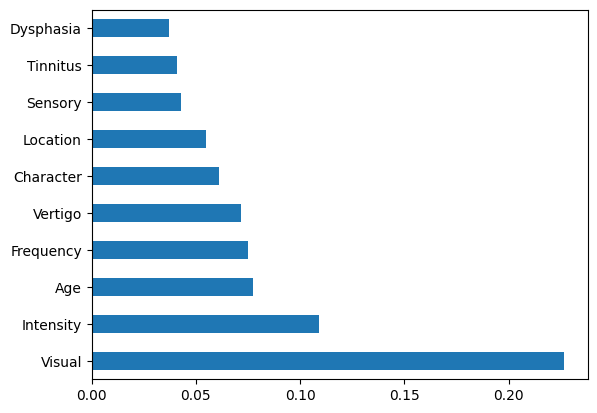

In [52]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

3. matriks heatmap

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns

In [54]:
corrmat = data.corr()
top_corr_features = corrmat.index

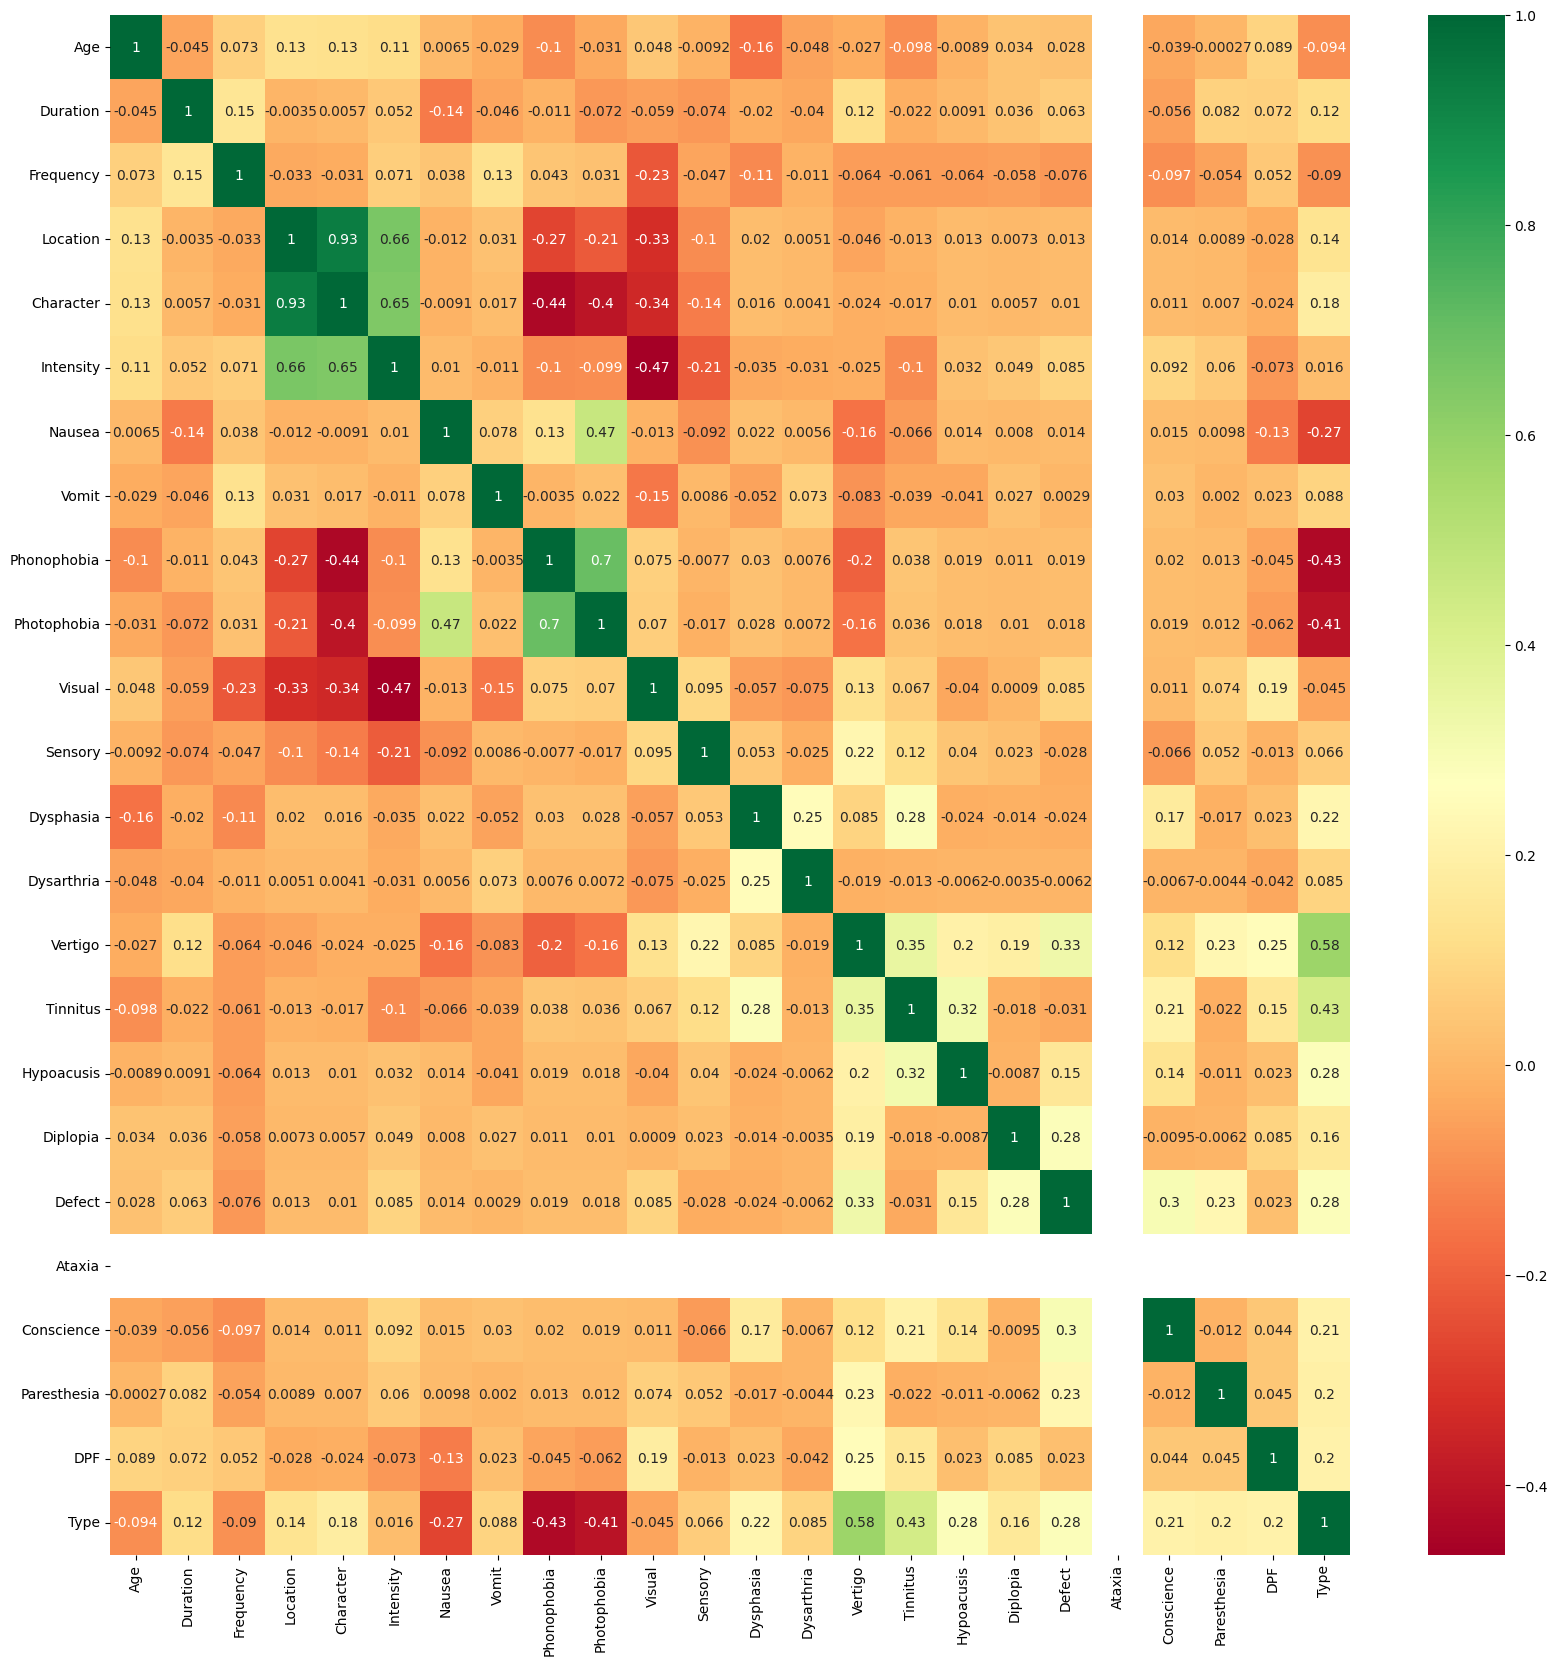

In [55]:
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")